# Time Series Segmentation
In this notebook, we test ClaSP against rival methods.

In [1]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

Let's load the scores from the different methods.

In [2]:
methods = [
    ("ClaSP", "clasp.csv"),
    ("Autoplait", "autoplait.csv"),
    ("FLOSS", "floss.csv"),
    ("Window-L$_2$", "window-l2.csv"),
    ("BinSeg-L$_2$", "binseg-l2.csv"),
    ("BOCD", "bocd.csv"),
]

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/reference/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["name"] = df.name
    df_scores[name] = df.score
    
df_scores = df_scores.fillna(1)

In [3]:
df_scores

,name,ClaSP,Autoplait,FLOSS,Window-L$_2$,BinSeg-L$_2$,BOCD
0,Cane,0.001124,1.000000,0.015543,0.222846,0.220037,0.400187
1,DutchFactory,0.002055,0.045771,0.003653,0.225317,0.007533,0.357493
2,EEGRat,0.001500,0.269000,0.002000,0.067500,0.405000,0.079000
3,EEGRat2,0.091500,1.000000,0.135500,0.307500,0.467500,0.357000
4,Fetal2013,0.001889,0.113722,0.002667,0.363056,0.306389,0.348000
5,GrandMalSeizures,0.000922,0.017849,0.001519,0.407715,0.443793,0.421061
6,GrandMalSeizures2,0.000767,0.004984,0.000671,0.216620,0.560721,0.024729
7,GreatBarbet1,0.008936,1.000000,0.009574,0.640426,0.603191,0.279149
8,GreatBarbet2,0.008723,1.000000,0.008723,0.740426,0.571277,0.197872
9,InsectEPG1,0.001647,0.028704,0.011764,0.074819,0.085760,0.211752


Let's calculate the mean/std error.

In [4]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean(), 5)}")

ClaSP: mean_error=0.01293
Autoplait: mean_error=0.73711
FLOSS: mean_error=0.04265
Window-L$_2$: mean_error=0.25705
BinSeg-L$_2$: mean_error=0.53678
BOCD: mean_error=0.2991


In [10]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std(), 5)}")

ClaSP: std_error=0.02465
Autoplait: std_error=0.40929
FLOSS: std_error=0.08009
Window-L$_2$: std_error=0.17391
BinSeg-L$_2$: std_error=0.27996
BOCD: std_error=0.21616


Let's compute the wins per method.

In [5]:
ranks = df_scores.rank(1, method = 'min', ascending=True)
means = np.array(ranks.mean(axis=0))

In [6]:
for name in df_scores.columns[1:]:
    print(f"{name}: wins={ranks[ranks[name] == 1].shape[0]}")

ClaSP: wins=80
Autoplait: wins=4
FLOSS: wins=10
Window-L$_2$: wins=3
BinSeg-L$_2$: wins=0
BOCD: wins=2


Let's plot and output the ranks.

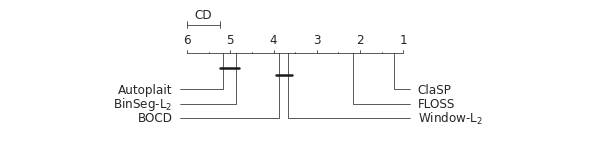

In [7]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, width=8, reverse=True, textspace=2.5)

In [8]:
for name, rank in zip(df_scores.columns[1:], means):
    print(f"{name}: rank={np.round(rank, 5)}")

ClaSP: rank=1.22449
Autoplait: rank=5.16327
FLOSS: rank=2.16327
Window-L$_2$: rank=3.66327
BinSeg-L$_2$: rank=4.87755
BOCD: rank=3.86735


Let's compute wins/losses against ClaSP.

In [9]:
for rival in df_scores.columns[1:]:
    if rival == "ClaSP": continue
    
    df_pair = df_scores[["ClaSP", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["ClaSP"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"ClaSP vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

ClaSP vs Autoplait: (wins/losses/ties): 93/5/0
ClaSP vs FLOSS: (wins/losses/ties): 88/9/1
ClaSP vs Window-L$_2$: (wins/losses/ties): 94/4/0
ClaSP vs BinSeg-L$_2$: (wins/losses/ties): 96/2/0
ClaSP vs BOCD: (wins/losses/ties): 96/2/0
